In [1]:
#Hier wird der Ordner festgelegt

import os
import numpy as np #wichtig um Daten einzulesen , np.array(), man kann mit arrays rechnen. Mit Listen gibt es häufig Probleme
import matplotlib.pyplot as plt
from kafe2 import XYContainer, Fit, Plot, ContoursProfiler
import math
from math import log10 , floor # damit man nicht math.log10 oder math.floor schreiben muss
import tabulate as tabulate
import latex_table as tab #benötigt die Python-Datai zum Latex-Tabellen erstellen von Oliver Cordes
import pandas as pd #nützlich um Tabellen im Notebook auszugeben
from Funktionen import * #meine eigenen Funktionen (Python-Datie)

#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/236_Galvanometer" #Directory

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

My current directory is : /home/jovyan/Praktikum_P2/236_Galvanometer
My directory name is : 236_Galvanometer


In [2]:
#Testen, ob der Import der Funktionen funktioniert hat
"""
a = 4.1233567
print("a:", a)
b = round_it(a,5)
print("b:", b)

c = [1.2345, 2.234564, 233.34535, 15242.12323]
print("c:", c)
d = round_list(c,3)
print("d:", d)
"""

a: 4.1233567
b: 4.1234
c: [1.2345, 2.234564, 233.34535, 15242.12323]
d: [1.23, 2.23, 233.0, 15200.0]


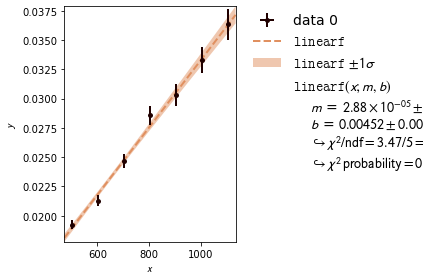

[[ 1.97457347e-12 -1.27376593e-09]
 [-1.27376593e-09  8.74661666e-07]]


In [3]:
from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

x_data = np.array([502, 602, 703, 803, 903, 1003, 1103])# Arrays  für x und y  und die zugehörigen Fehler erstellen
y_data = np.array([52, 47, 40.5, 35, 33, 30, 27.5])
x_err  = np.array([1]*7)
#x_err  = np.array([1,1,1,1,1,1,1])
y_err  = np.array((0.000369822, 0.000452694, 0.000609663, 0.000816327, 0.000918274, 0.001111111, 0.001322314))
#y_err  =np.array([1,1,1,1,1,1,1])np.array([1]*7)

def linearf( x, m, b):# lineare Funktion aufstellen
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): # funktion mit den datn als argumenten erstellen
    xy_data = XYContainer(x_data=x_data,# behälter für x und y erstellen
                      y_data=1/y_data)
    xy_data.add_error(axis='x', err_val=x_err)# felher hinzufügen
    xy_data.add_error(axis='y', err_val=y_err)
    linear_fit = Fit(data=xy_data, model_function=linearf)# Objekt mit dem xy- Behälter und der linearen Funkrion erzeugen
    fit_results = linear_fit.do_fit() # ergebnisse bestimmen und später ausgeben lassen
    #linear_fit.report()
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    plt.savefig('236c.jpg', dpi = 300)
    plt.show()
    return fit_results

print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])# Ergebnisse in der Kovarianzmatrix ausgeben lassen


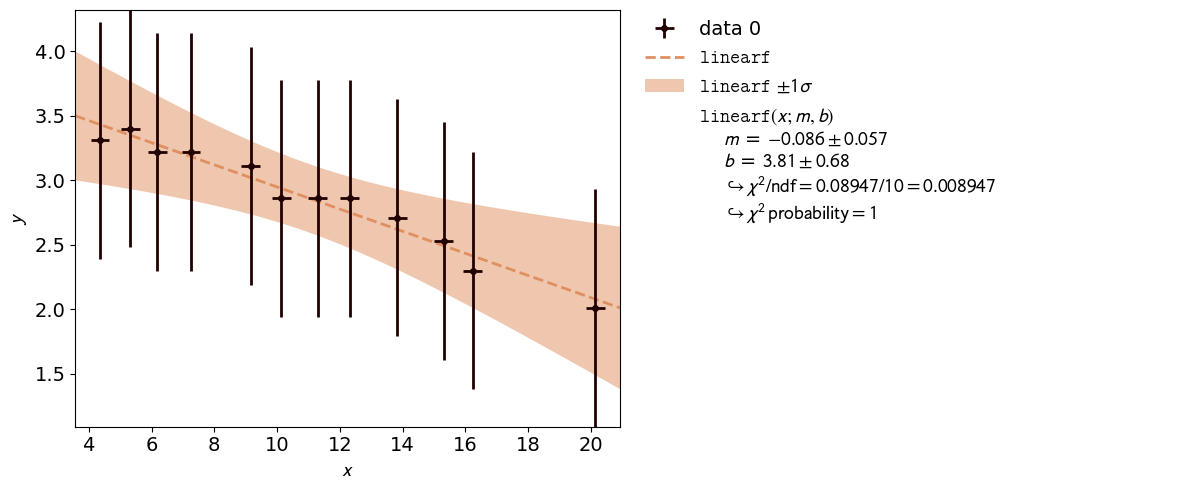

[[ 0.00328339 -0.0359942 ]
 [-0.0359942   0.4651751 ]]


In [4]:
from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

x_data = np.array([4.36, 5.32, 6.19, 7.26, 9.16, 10.13, 11.30, 12.32, 13.83, 15.31, 16.23, 20.14])# Arrays  für x und y  und die zugehörigen Fehler erstellen
y_data = np.array([3.31, 3.4, 3.22, 3.22, 3.11, 2.86, 2.86, 2.86, 2.71, 2.53, 2.30, 2.01])
x_err  = np.array([0.3]*12)
#x_err  = np.array([1,1,1,1,1,1,1])
y_err  = np.array([0.92]*12)
#y_err  =np.array([1,1,1,1,1,1,1])np.array([1]*7)

def linearf( x, m, b):# lineare Funktion aufstellen
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): # funktion mit den datn als argumenten erstellen
    xy_data = XYContainer(x_data=x_data,# behälter für x und y erstellen
                      y_data=y_data)
    xy_data.add_error(axis='x', err_val=x_err)# felher hinzufügen
    xy_data.add_error(axis='y', err_val=y_err)
    linear_fit = Fit(data=xy_data, model_function=linearf)# Objekt mit dem xy- Behälter und der linearen Funkrion erzeugen
    fit_results = linear_fit.do_fit() # ergebnisse bestimmen und später ausgeben lassen
    #linear_fit.report()
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    plt.savefig('236h.jpg', dpi = 300)
    plt.show()
    return fit_results

print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])# Ergebnisse in der Kovarianzmatrix ausgeben lassen



In [5]:
#Korrektur Werte der Graphen ausrechnen für c) und h)

import numpy as np

#c)

R = np.array([502, 602, 703, 803, 903, 1003, 1103]) #Widerstand R
Phi_c = np.array([104, 94, 81, 70, 66, 60, 55]) #Auslenkung Phi

x_c = R
print("x_c: Widerstand R:", x_c)
y_c = 1/(Phi_c/2) #Kehrwert für geradenfit ausrechnen
print("y_c: 1/(Phi/2):", y_c)

#h)

t = np.array([9.16, 7.26, 6.19, 10.13, 11.30, 12.3, 13.83, 15.31, 16.23, 5.32, 4.36, 20.14]) #Entladezeit t
Phi_h = np.array([45, 50, 50, 35, 35, 35, 30, 25, 26, 60, 55, 15]) #Auslenkung Phi

x_h = t
print("x_h: Entladezeit t:", x_h)
y_h = np.log(Phi_h/2) #Logarithmus von Phi_h berechnen
print("y_h: ln(Phi/2)", y_h)

x_c: Widerstand R: [ 502  602  703  803  903 1003 1103]
y_c: 1/(Phi/2): [0.01923077 0.0212766  0.02469136 0.02857143 0.03030303 0.03333333
 0.03636364]
x_h: Entladezeit t: [ 9.16  7.26  6.19 10.13 11.3  12.3  13.83 15.31 16.23  5.32  4.36 20.14]
y_h: ln(Phi/2) [3.11351531 3.21887582 3.21887582 2.86220088 2.86220088 2.86220088
 2.7080502  2.52572864 2.56494936 3.40119738 3.314186   2.01490302]
